In [1]:
#using Pkg

#Pkg.add("SolveDSGE")

using SolveDSGE
filename = "dsge_sgm.txt"


path = joinpath(@__DIR__,filename)

process_model(path)



The model's variables are now in this order: ["z", "k", "c", "ce"]
The model's shocks are in this order:        ["ϵ"]


In [2]:
# If the model file and the solution file are in the same folder


# Hardcode the path to the processed model file if the model file and the solution file are in different folders

model_processed_path = "D:\\julia_work\\Short Course\\dsge_sgm_processed.txt"
include(model_processed_path)

dsge_sgm = retrieve_processed_model(model)
#dsge_sgm = create_model_structure(model) # Does the same as the retrieve_processed_model() function

x = [0.0, 34.6, 2.4, 0.2]

tol = 1e-8
maxiters = 1000
ss_obj = compute_steady_state(dsge_sgm,x,tol,maxiters)
ss = ss_obj.zero


4-element Vector{Float64}:
 -5.060973569443639e-23
 34.60874051003304
  2.376583376163859
  0.17883754335706412

In [3]:
P1 = PerturbationScheme(ss,1.0,"first")
P2 = PerturbationScheme(ss,1.0,"second")
P3 = PerturbationScheme(ss,1.0,"third")
P4 = PerturbationScheme(ss,1.0,"fourth")

soln_1o = solve_model(dsge_sgm,P1)
soln_2o = solve_model(dsge_sgm,P2)
soln_3o = solve_model(dsge_sgm,P3)
soln_4o = solve_model(dsge_sgm,P4)

C = ChebyshevSchemeStoch(ss,chebyshev_nodes,[21,21],9,3,[0.15 42.5;-0.15 28.0],tol,1e-6,maxiters,:newton)
#soln_nl_cheb  = solve_model(dsge_sgm,C)
soln_nl_cheb = solve_model(dsge_sgm,soln_1o,C)

S = SmolyakSchemeStoch(ss,chebyshev_gauss_lobatto,9,3,[0.15 42.5;-0.15 28.0],tol,1e-6,maxiters,:newton)
#soln_nl_smol = solve_model(dsge_sgm,S)
soln_nl_smol = solve_model(dsge_sgm,soln_2o,S)

H = HyperbolicCrossSchemeStoch(ss,chebyshev_nodes,11,5,9,[0.15 42.5;-0.15 28.0],tol,1e-6,maxiters,:newton)
#soln_nl_hcross = solve_model(dsge_sgm,H)
#soln_nl_hcross = solve_model(dsge_sgm,soln_2o,H)
soln_nl_hcross = solve_model(dsge_sgm,soln_nl_smol,H)

M = PiecewiseLinearSchemeStoch(ss,[21,21],9,[0.15 42.5;-0.15 28.0],tol,1e-6,maxiters,:newton)
soln_nl_pwise = solve_model(dsge_sgm,M)

simulated_data     = simulate(soln_nl_cheb,ss[1:2],100000)
pos_imps, neg_imps = impulses(soln_nl_cheb,50,[1],10000)



([0.010000000000001426 0.009500000000001604 … 0.0008525759033428707 0.0008099471081757615; 0.0 0.021750052734236358 … 0.21499115402883626 0.21261395233888342; 0.007473391079112625 0.007743941963527273 … 0.006998751570926186 0.006897056122057111; -0.00106867526339184 -0.0011128212462083674 … -0.0010613047791450659 -0.0010460225319621765], [-0.010000000000001426 -0.009500000000001604 … -0.0008525759033428706 -0.0008099471081757624; 0.0 -0.02150646998556217 … -0.21320096622400028 -0.21085360620960428; -0.007426440485352786 -0.007693409639833209 … -0.006963097724590112 -0.006861967316145342; 0.0010722462559680527 0.0011165780252719154 … 0.0010656372044674978 0.0010501621164261347])

In [4]:
ee1, ss1 = euler_errors(dsge_sgm,soln_1o,[0.15 42.5;-0.15 28.0],1000,123456)
ee2, ss2 = euler_errors(dsge_sgm,soln_2o,[0.15 42.5;-0.15 28.0],1000,123456)
ee3, ss3 = euler_errors(dsge_sgm,soln_3o,[0.15 42.5;-0.15 28.0],1000,123456)
ee4, ss4 = euler_errors(dsge_sgm,soln_4o,[0.15 42.5;-0.15 28.0],1000,123456)

eec, ssc = euler_errors(dsge_sgm,soln_nl_cheb,1000,123456)
ees, sss = euler_errors(dsge_sgm,soln_nl_smol,1000,123456)
eep, ssp = euler_errors(dsge_sgm,soln_nl_hcross,1000,123456)
eeh, ssh = euler_errors(dsge_sgm,soln_nl_pwise,1000,123456)

compare_solutions(soln_1o,soln_nl_cheb,soln_nl_cheb.domain,100_000,123456)
compare_solutions(soln_2o,soln_nl_cheb,soln_nl_cheb.domain,100_000,123456)
compare_solutions(soln_3o,soln_nl_cheb,soln_nl_cheb.domain,100_000,123456)
compare_solutions(soln_4o,soln_nl_cheb,soln_nl_cheb.domain,100_000,123456)
compare_solutions(soln_nl_smol,soln_nl_cheb,soln_nl_cheb.domain,100_000,123456)
compare_solutions(soln_nl_hcross,soln_nl_cheb,soln_nl_cheb.domain,100_000,123456)
compare_solutions(soln_nl_pwise,soln_nl_cheb,soln_nl_cheb.domain,100_000,123456)

2-element Vector{Float64}:
 0.37276158305541296
 0.06838474253682902

In [7]:
P1 = PerturbationScheme(ss,1.0,"first")

sol = solve_model(dsge_sgm,P1)

n_periods = 40

mc_reps = 1000

irf,irf_neg =  impulses(sol, n_periods, [.1],mc_reps)

size(irf)

size(irf_neg)



(4, 40)

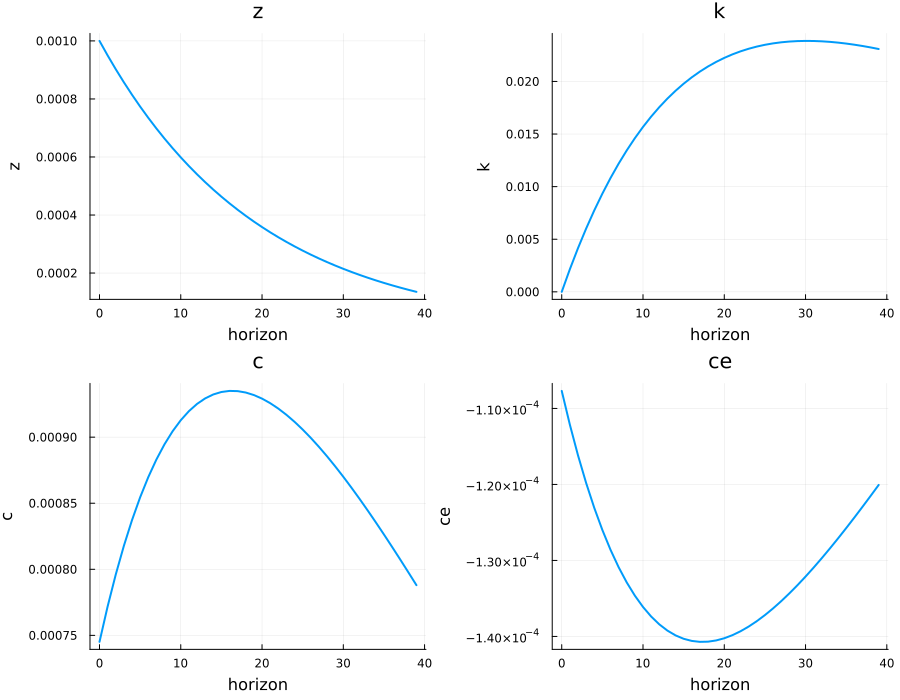

In [8]:
# Extract and plot 
using Plots
labels = [:z, :k, :c, :ce]    # row order
t = 0:39                      # horizons

# 2×2 panel with one series per plot
plt = plot(layout=(2,2), size=(900,700))
for r in 1:4
    plot!(plt[r], t, irf[r, :],
          lw=2, xlabel="horizon", ylabel=String(labels[r]),
          title=String(labels[r]), legend=false)
end
display(plt)